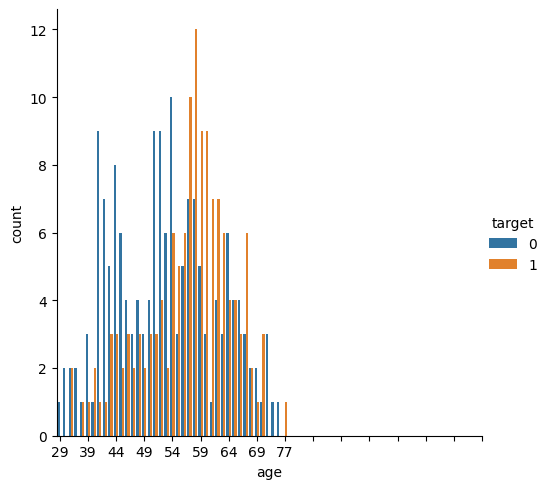

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Bài tập 1
df = pd.read_csv('./data/cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age

#.         Your code here ******************
ax = sns.catplot(kind="count",x="age", hue="target", data=df,order=df['age'].sort_values().unique())
ax.ax.set_xticks(np.arange(0,80,5))
plt.show()



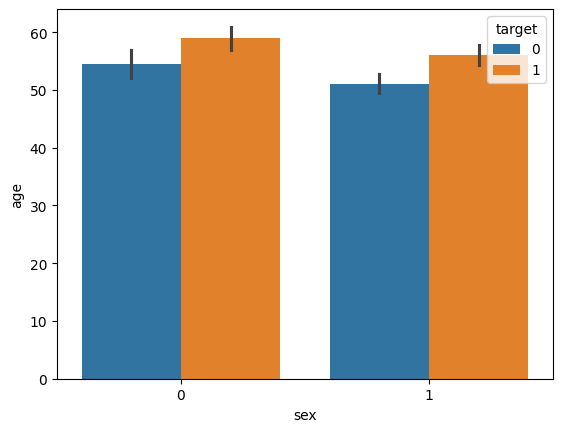

In [10]:
# bai tap 2
# barplot of age vs sex with hue = target

#.         Your code here ******************
sns.barplot(y="age",x="sex",hue="target",data=df)
plt.show()

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#########################################   KNeighborsClassifier   #############################################################
###############################################################################

#Bai tap 3
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#.         Your code here ******************
KNN = KNeighborsClassifier(n_neighbors=5,weights="uniform",algorithm="auto",leaf_size=30,p=2,metric="minkowski")
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
y_pred_train = KNN.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [18]:
#########################################   SVM   #############################################################

#Bai Tap 4

#.         Your code here ******************
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))



Accuracy for training set for SVC = 0.66
Accuracy for test set for SVC = 0.67


In [23]:
#########################################   Naive Bayes  #############################################################
# Bai tap 5

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
#.         Your code here ******************
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))



Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


In [26]:
#Bai tap 6

#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=10,min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.72


In [27]:
#########################################  Random Forest  #############################################################
#bai tap 7
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 42, max_depth=10,min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)
#.         Your code here ******************



print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


In [28]:
# bap tap 8
###############################################################################
# applying Adaboost


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)
#.         Your code here ******************


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [29]:
# Bai tap 9
###############################################################################
# Gradient Adaboost



X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3,min_samples_split=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)
#.         Your code here ******************

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.84


In [31]:
#bai tap 10
###############################################################################
# applying XGBoost
from xgboost import XGBClassifier

classifier = XGBClassifier(objective='binary:logistic',random_state=42,n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)
#.         Your code here ******************


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


In [35]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import StackingClassifier
dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)
clf = [("dtc",dtc),("rfc",rfc),("knn",knn),("gc",gc),("svc",svc),("ad",ad)]
#.         Your code here ******************
classifier = StackingClassifier(estimators=clf,final_estimator=xgb)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Accuracy for training set for StackingClassifier = 0.92
Accuracy for test set for StackingClassifier = 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
